In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

import xgboost as xgb

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.linear_model import LassoCV, Lasso

from math import sqrt

import seaborn as sns


np.set_printoptions(suppress=True, precision=4)
plt.rcParams['figure.figsize'] = 10, 6
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/abulbasar/data/master/startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          48 non-null float64
Administration     50 non-null float64
Marketing Spend    47 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


There are 50 observations and 5 columns. 4 columns - R&D Spend, Administration and Marketing Spend, and Profile are numeric and one is categorical - State. There is 2 null values in columns R&D Spend feature and and 3 in Marketing Spend. 

Replace the null values with median for respective state. 

In [4]:
df_null_idx = df[df.isnull().sum(axis = 1) > 0].index
df.iloc[df_null_idx]

,R&D Spend,Administration,Marketing Spend,State,Profit
19,86419.70,153514.11,NaN,New York,122776.86
47,NaN,135426.92,NaN,California,42559.73
48,542.05,51743.15,NaN,New York,35673.41
49,NaN,116983.80,45173.06,California,14681.40


In [5]:
median_values = df.groupby("State")[["R&D Spend", "Marketing Spend"]].median()
median_values

,R&D Spend,Marketing Spend
State,,
California,64664.710,186014.36
Florida,74661.715,253176.18
New York,77044.010,261776.23


In [6]:
df["R&D Spend"] = df.apply(lambda row: median_values.loc[row["State"], "R&D Spend"]  if np.isnan(row["R&D Spend"]) else row["R&D Spend"], axis = 1 )
df["Marketing Spend"] = df.apply(lambda row: median_values.loc[row["State"], "Marketing Spend"]  if np.isnan(row["Marketing Spend"]) else row["Marketing Spend"], axis = 1 )
df.iloc[df_null_idx]

,R&D Spend,Administration,Marketing Spend,State,Profit
19,86419.70,153514.11,261776.23,New York,122776.86
47,64664.71,135426.92,186014.36,California,42559.73
48,542.05,51743.15,261776.23,New York,35673.41
49,64664.71,116983.80,45173.06,California,14681.40


In [7]:
# Check if there are any more null values.
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Let's see the distribution of the Profit using a histogram plot and see if there is any outliers in the data using bosplot.

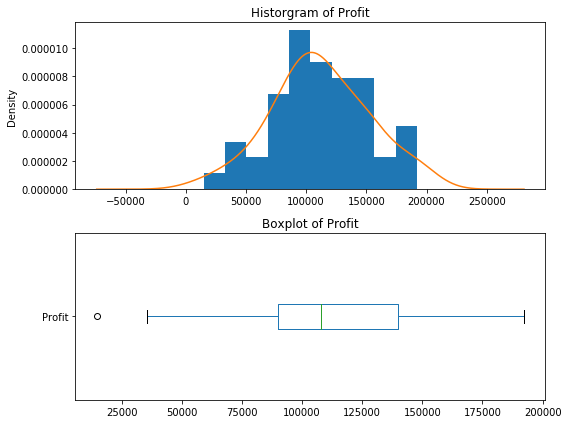

In [8]:
plt.figure(figsize = (8, 6))
plt.subplot(2, 1, 1)
df.Profit.plot.hist(bins = 10, normed = True)
df.Profit.plot.kde(title = "Historgram of Profit")

plt.subplot(2, 1, 2)
df.Profit.plot.box(vert = False, title = "Boxplot of Profit")

plt.tight_layout()

Profit has one outlier. We can try to take log scale to remove the outlier value before doing any prediction. But for now, let ignore the outlier.

Let's plot association between each pair of columns. 

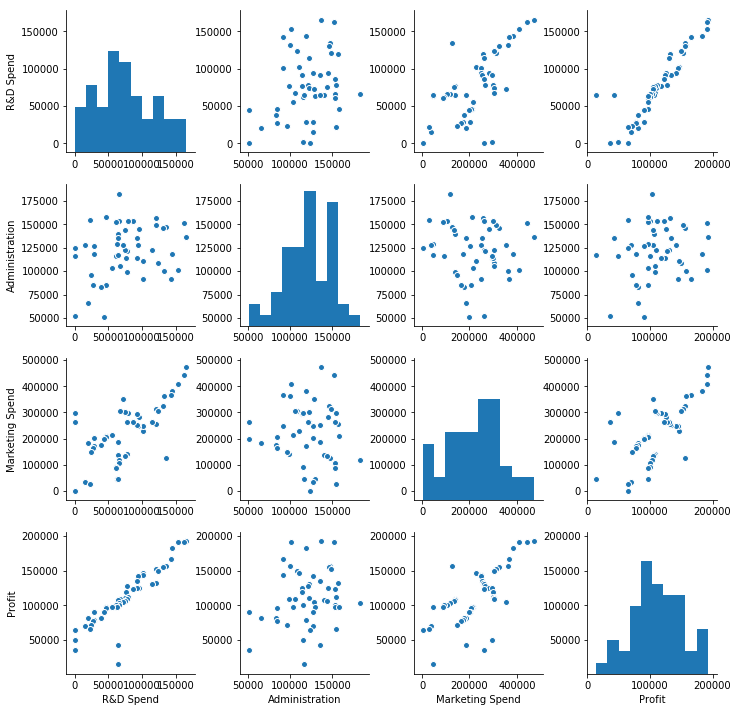

In [9]:
sns.pairplot(df)

Displays only the numeric column. Let's how the avg Profit plays for each State.

Text(0,0.5,'Profit')

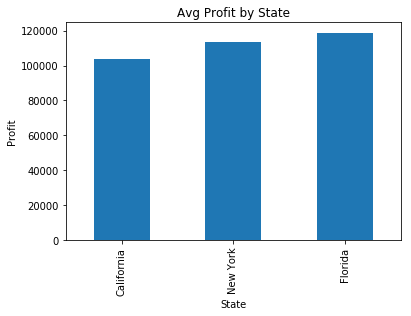

In [10]:
df.groupby("State").Profit.mean().sort_values().plot.bar(title = "Avg Profit by State")
plt.xlabel("State")
plt.ylabel("Profit")

Avg Profit is highest in state of Florida and least in California.

Let's create the y vector containing the outcome column.

In [11]:
y = df.Profit.values
y

array([ 192261.83,  191792.06,  191050.39,  182901.99,  166187.94,
        156991.12,  156122.51,  155752.6 ,  152211.77,  149759.96,
        146121.95,  144259.4 ,  141585.52,  134307.35,  132602.65,
        129917.04,  126992.93,  125370.37,  124266.9 ,  122776.86,
        118474.03,  111313.02,  110352.25,  108733.99,  108552.04,
        107404.34,  105733.54,  105008.31,  103282.38,  101004.64,
         99937.59,   97483.56,   97427.84,   96778.92,   96712.8 ,
         96479.51,   90708.19,   89949.14,   81229.06,   81005.76,
         78239.91,   77798.83,   71498.49,   69758.98,   65200.33,
         64926.08,   49490.75,   42559.73,   35673.41,   14681.4 ])

Create dummy variables for categorical feature.

In [12]:
df_features = df.iloc[:, 0:4]
df_dummied = pd.get_dummies(df_features, columns=["State"], drop_first=True)
df_dummied.sample(10)

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
17,94657.16,145077.58,282574.31,0,1
13,91992.39,135495.07,252664.93,0,0
38,20229.59,65947.93,185265.10,0,1
35,46014.02,85047.44,205517.64,0,1
42,23640.93,96189.63,148001.11,0,0
11,100671.96,91790.61,249744.55,0,0
31,61136.38,152701.92,88218.23,0,1
22,73994.56,122782.75,303319.26,1,0
44,22177.74,154806.14,28334.72,0,0
41,27892.92,84710.77,164470.71,1,0


State column has been replaced by two additional column - one for Florida and one NY. First value in the categorical values CA has been dropped to avoid collinearity issue.

Now, let's create X feature matrix and y outcome vector.  

In [13]:
X = df_dummied.values
X[0, :]

array([ 165349.2,  136897.8,  471784.1,       0. ,       1. ])

Let's normalize the feature values to bring them to a similar scale.

In [14]:
scaler = StandardScaler() 
X_std = scaler.fit_transform(X)
pd.DataFrame(X_std).head()

,0,1,2,3,4
0,2.073486,0.560753,2.260465,-0.685994,1.393261
1,2.009412,1.082807,2.004818,-0.685994,-0.717741
2,1.796193,-0.728257,1.675110,1.457738,-0.717741
3,1.585002,-0.096365,1.448347,-0.685994,1.393261
4,1.532256,-1.079919,1.292210,1.457738,-0.717741


Split the X and y into training and test sets.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, 
                                                    test_size = 0.3, random_state = 100)

In [16]:
print("Training set: ", X_train.shape, y_train.shape)

Training set:  (35, 5) (35,)


In [17]:
print("Test set: ", X_test.shape, y_test.shape)

Test set:  (15, 5) (15,)


Ratio of the size of the training data

In [18]:
X_train.shape[0] / df.shape[0]

0.7

Fit linear regression model

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
lr.intercept_, lr.coef_

(111827.94141541519,
 array([ 36952.9979,  -1074.4562,   1885.608 ,    894.426 ,   -442.6833]))

By looking at the cofficients, we can conclude that R&D Spend has the higest influence on the outcome variable.

Predict the outcome based on the model

In [21]:
y_test_pred = lr.predict(X_test)

In [22]:
output = pd.DataFrame({"actual": y_test, "prediction": y_test_pred})
output["error"] = output.actual - output.prediction
output

,actual,prediction,error
0,156122.51,159019.628029,-2897.118029
1,90708.19,71812.853004,18895.336996
2,89949.14,86017.265670,3931.874330
3,103282.38,100397.875646,2884.504354
4,69758.98,54763.007516,14995.972484
5,14681.40,98569.217498,-83887.817498
6,156991.12,161629.007963,-4637.887963
7,96778.92,96063.934484,714.985516
8,118474.03,113044.675267,5429.354733
9,71498.49,65850.551449,5647.938551


A simpliest prediction model could have been the average. Let's how the model did overall against one feature.

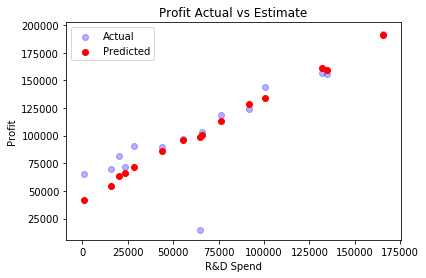

In [23]:
X_test_inv = scaler.inverse_transform(X_test)
plt.scatter(X_test_inv[:, 0], y_test, alpha = 0.3, c = "blue", label = "Actual")
plt.scatter(X_test_inv[:, 0], y_test_pred, c = "red", label = "Predicted")

plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.title("Profit Actual vs Estimate")
plt.legend()

In [24]:
np.mean((y_test_pred - y_test) ** 2)

579577930.69277871

In [25]:
y_train_pred = lr.predict(X_train)

Compare the root mean squared error (RMSE) of test dataset against the training.

In [26]:
print("Test rmse: ", sqrt(mean_squared_error(y_test, y_test_pred)), 
      "\nTraining rmse:", sqrt(mean_squared_error(y_train, y_train_pred)))

Test rmse:  24074.424825793423 
Training rmse: 12413.672826747377


r2 score can have a max value 1, negative values of R2 means suboptimal model 

In [27]:
r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)

(0.69192474547582505, 0.89284947669793391)

On the training the both RMSE and R2 scores perform natually better than those on the test dataset.

Let's calculate R2 score manually. 

In [28]:
SSR = np.sum((y_train - y_train_pred) ** 2)  # Sum of squared residuals
SST = np.sum((y_train - np.mean(y_train_pred)) ** 2) # Sum of squared totals
R2 = 1 - SSR/SST
R2

0.89284947669793391

R2 can be viewed as (1 - mse/variance(y))

### Significance Scores for feature selection

In [29]:
from sklearn.feature_selection import f_regression

In [30]:
_, p_vals = f_regression(X_train, y_train)
p_vals

array([ 0.    ,  0.2718,  0.0001,  0.3377,  0.9174])

In [31]:
pd.DataFrame({"feature": df_dummied.columns, "p_value": p_vals})

,feature,p_value
0,R&D Spend,2.608341e-17
1,Administration,2.718478e-01
2,Marketing Spend,6.395756e-05
3,State_Florida,3.377138e-01
4,State_New York,9.174009e-01


p-value indicates the significant scores for each feature. p-value < 0.05 indicates, the corresponding feature is statistically significant. We can rebuild the model excluding the non-significant features one by one until all remaining features are significant.  

# Power Plant Dataset
Let's look at another dataset

In [32]:
df = pd.read_csv("/data/Combined_Cycle_Power_Plant.csv")
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [33]:
X = df.iloc[:, 0:4].values
y = df.PE.values

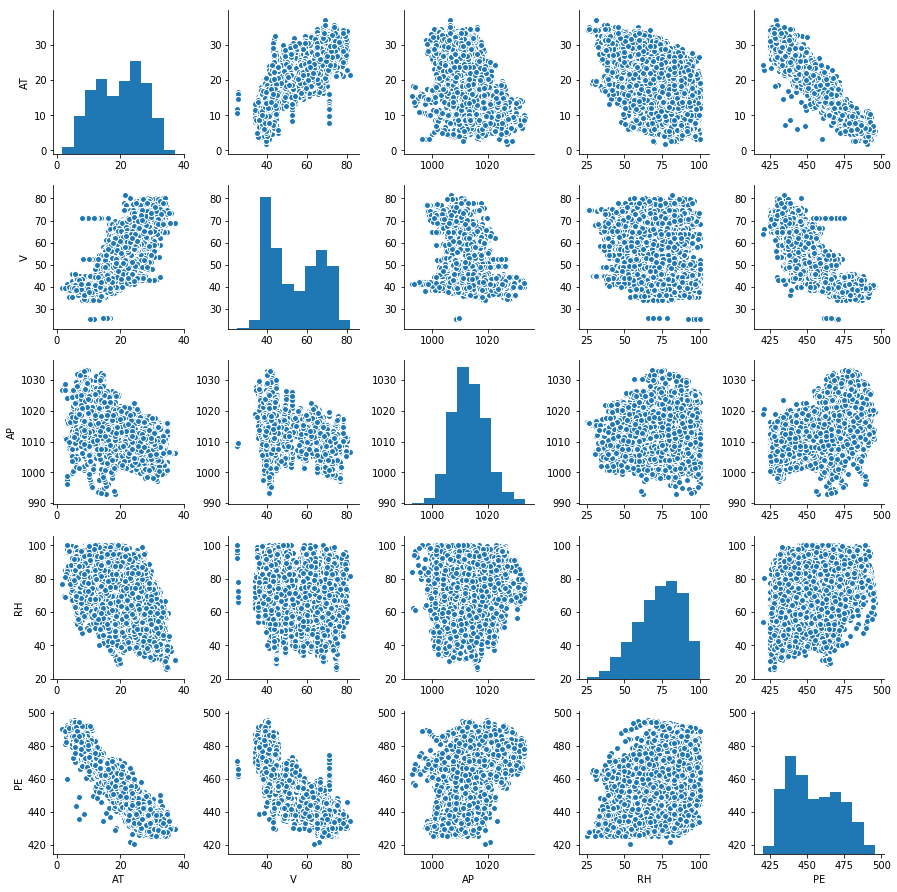

In [34]:
sns.pairplot(df)

In [35]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state = 1)

In [37]:
def rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

In [38]:
lr = LinearRegression(normalize=False)
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
rmse(y_test, y_test_pred)

4.56908403075697

In [39]:
from scipy import stats

((array([-3.899 , -3.6787, -3.5579, ...,  3.5579,  3.6787,  3.899 ]),
  array([-43.4127, -43.029 , -43.029 , ...,  16.7918,  17.4058,  17.4058])),
 (4.5192590374114339, -0.023764787618388999, 0.98885330775966918))

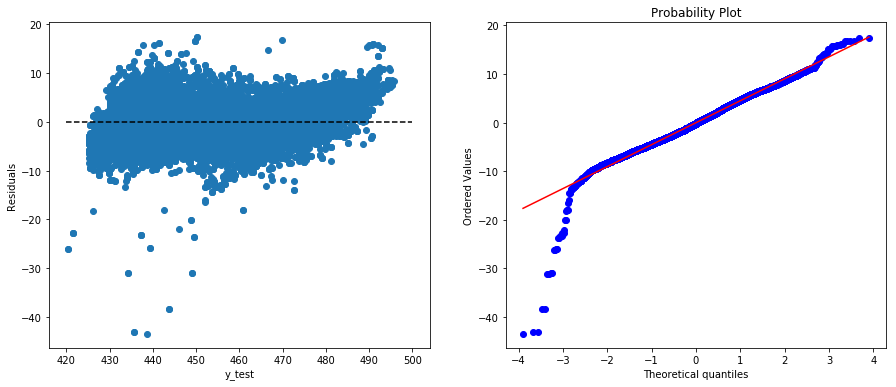

In [40]:
residuals = y_test - y_test_pred

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, residuals)
plt.xlabel("y_test")
plt.ylabel("Residuals")
plt.hlines([0], xmin = 420, xmax = 500, linestyles = "dashed")

plt.subplot(1, 2, 2)
stats.probplot(residuals, plot=plt)

Residual plots show there are outliers in the lower end of the y_test values. qqPlot shows that residuals do not exhibit normaality, indicating non linearity in the model.

In [41]:
poly = PolynomialFeatures(degree=2)

X = df.iloc[:, 0:4].values
X_poly = poly.fit_transform(X)
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.3, random_state = 100)
X_poly_train_std = scaler.fit_transform(X_poly_train)
X_poly_test_std = scaler.transform(X_poly_test)

pd.DataFrame(X_poly_train_std).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,-0.922813,-1.038771,1.548754,0.887904,-0.961410,-0.981797,-0.911073,-0.588861,-1.003315,-1.017924,-0.360645,1.551684,0.938456,0.898371
1,0.0,0.806093,-0.641344,-0.375735,-1.079505,0.747957,0.058652,0.807495,0.199676,-0.692063,-0.653966,-1.211656,-0.377966,-1.085846,-1.101707
2,0.0,-0.838247,-0.839664,0.500565,-0.016857,-0.904417,-0.887329,-0.836248,-0.847481,-0.851878,-0.836163,-0.703084,0.497996,-0.002738,-0.120483
3,0.0,-1.512091,-1.077333,1.134197,-0.278400,-1.282547,-1.273221,-1.512930,-1.687473,-1.031601,-1.065114,-1.062435,1.134184,-0.246762,-0.383576
4,0.0,1.232950,1.498469,-0.315068,-0.995069,1.346129,1.527732,1.238003,0.660068,1.602163,1.506417,0.371953,-0.317467,-1.000394,-1.032252


In [42]:
lr.fit(X_poly_train_std, y_train)
print("Train rmse: ", rmse(y_train, lr.predict(X_poly_train_std)))
print("Test rmse: ", rmse(y_test, lr.predict(X_poly_test_std)))

Train rmse:  4.246283890430433
Test rmse:  4.276988298022075


In [43]:
print(lr.intercept_, lr.coef_)

454.309651218 [  0.     -39.9701 -42.9304  92.6406  61.3886   4.9224   7.0201  20.0357
  -2.6156  -1.2008  36.9954   0.0829 -91.48   -57.9414  -3.7064]


Polynomial regression generally sufferes from overfitting. Let's regularize the model using Lasso.

In [44]:
lasso = Lasso(alpha=0.03, max_iter=10000, normalize=False, random_state=100)
lasso.fit(X_poly_train_std, y_train)
print("Train rmse: ", rmse(y_train, lasso.predict(X_poly_train_std)))
print("Test rmse: ", rmse(y_test, lasso.predict(X_poly_test_std)))
print(lasso.intercept_, lasso.coef_)

Train rmse:  4.330404075518093
Test rmse:  4.35914090833783
454.309651218 [  0.     -17.3624  -1.4063   0.4679   0.       4.471    0.      -0.
  -1.0568  -0.      -0.435   -1.6751   0.       0.      -0.    ]


Let's find cross validation score that accuracy score is more reliable in a sense that it incorporates every piece of is incorporated in both training and testing.

In [45]:
X_poly_std = scaler.fit_transform(X_poly)
lasso = Lasso(alpha=0.03, max_iter=10000, random_state=100)
scores = cross_val_score(lasso, X_poly_std, y, cv = 10, scoring="neg_mean_squared_error")
scores = np.sqrt(-scores)
print("RMSE scores", scores)
print("Mean rmse: ", np.mean(scores))

RMSE scores [ 4.307   4.371   4.3509  4.3279  4.3506  4.3315  4.4165  4.2604  4.3743
  4.3033]
Mean rmse:  4.33935182329


### Encapsulate the steps in a pipeline

In [46]:
from sklearn.pipeline import Pipeline

In [47]:
pipeline = Pipeline(steps = [
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler()),
    ("lasso", Lasso(alpha=0.03, max_iter=10000, normalize=False, random_state=1))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
pipeline.fit(X_train, y_train)
rmse(y_test, pipeline.predict(X_test))

4.353479757142914

LassoCV helps find the best alpha. We could also use model tuning techqniues to find best alpha as well.

In [48]:
# Find best alpha
lassocv = LassoCV(cv = 10, max_iter=10000, tol=1e-5)
lassocv.fit(X_poly_std, y)
print("Lassocv alpha: ", lassocv.alpha_)

# Apply the best alpha to find cross validation score
lasso = Lasso(alpha = lassocv.alpha_, max_iter=10000, random_state=100)
scores = cross_val_score(lasso, X_poly_std, y, cv = 10, scoring="neg_mean_squared_error")
print("Mean rmse: ", np.mean(np.sqrt(-scores)))

Lassocv alpha:  0.0161806999848
Mean rmse:  4.32254217026


Look at the cofficients values. Many of the features are not zero making the model parsimonious hence more robust - that is less prone to overfitting.

Let's plot how coefficient reached 0 values by varying the alpha valuess.

/Users/abulbasar/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Text(0,0.5,'Coefficients of the features')

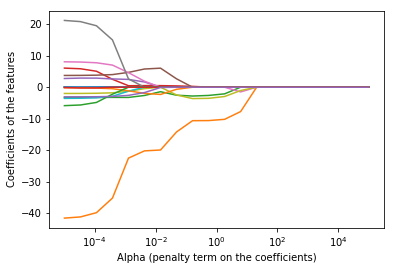

In [49]:
coefs = []
alphas = 10 ** np.linspace(-5, 5, 20)
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000, tol=1e-5,random_state=100)
    lasso.fit(X_poly_std, y)
    coefs.append(lasso.coef_)

plt.plot(alphas, coefs)
plt.xscale("log")
plt.xlabel("Alpha (penalty term on the coefficients)")
plt.ylabel("Coefficients of the features")
    

From this graph, which alpha values should we select. That question can be answered by looking which alpha values gives the best performance (rmse for example). lassocv function does that for us, or we can use model tuning techniques using grid search - that will be explained later.

### Xgboost


In [52]:
poly = PolynomialFeatures(degree=2)

X = df.iloc[:, 0:4].values
X_poly = poly.fit_transform(X)
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.3, random_state = 100)
X_poly_train_std = scaler.fit_transform(X_poly_train)
X_poly_test_std = scaler.transform(X_poly_test)

In [53]:
gbm = xgb.XGBRegressor(max_depth=10, learning_rate=0.1, n_estimators=100, 
                     objective='reg:linear', booster='gbtree', 
                     reg_alpha=0.01, reg_lambda=1, random_state=0)
gbm.fit(X_poly_train_std, y_train)
print("rmse:", rmse(y_test, gbm.predict(X_poly_test_std)))

rmse: 1.8581129118988502


rmse: 2.019509243562749


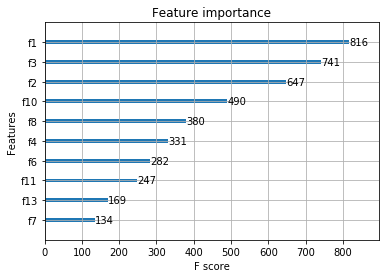

In [55]:
param = {'silent':1, 
         'objective':'reg:linear', 
         'booster':'gbtree',
         'alpha': 0.01, 
         'lambda': 1
        }

dtrain = xgb.DMatrix(X_poly_train_std, label=y_train)
dtest = xgb.DMatrix(X_poly_test_std, label=y_test)
watchlist  = [(dtrain,'eval'), (dtest, 'train')]
num_round = 100
bst = xgb.train(param, dtrain, num_round, watchlist, verbose_eval=False)
print("rmse:", rmse(y_test, bst.predict(dtest)))

plt.figure(figsize=(8, 10))
xgb.plot_importance(bst)